In [ ]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [11]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

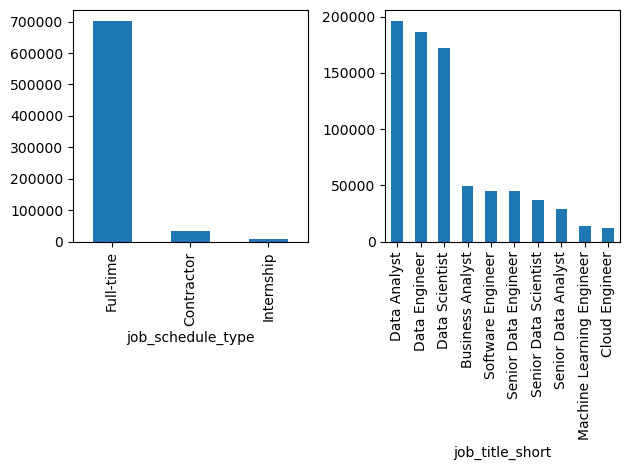

In [17]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])


fig.tight_layout()

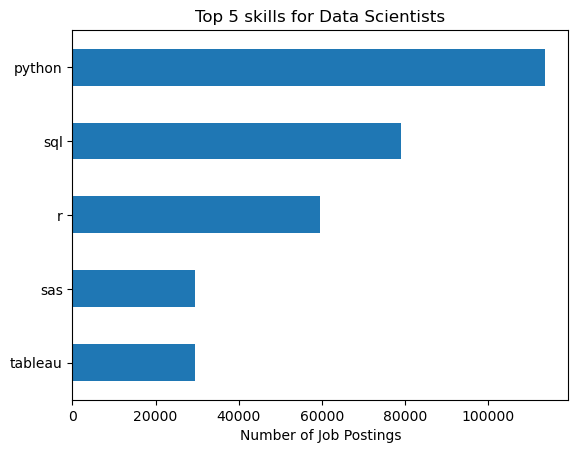

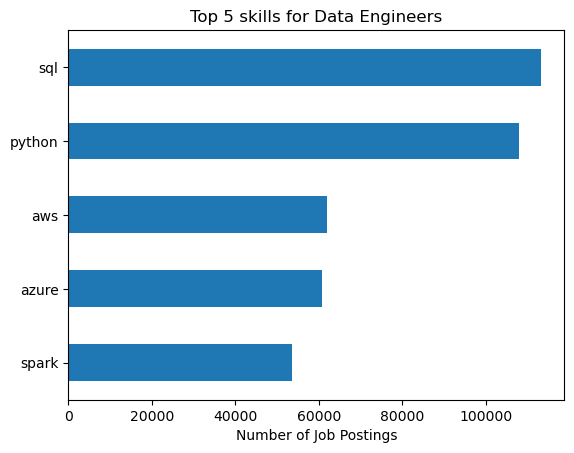

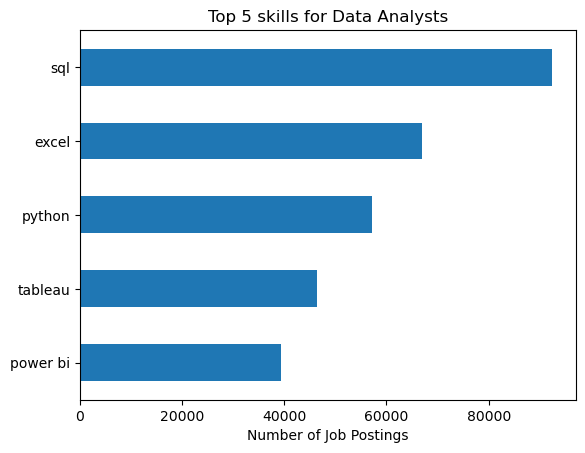

In [20]:
df_exploded = df.explode('job_skills')
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)


job_title = 'Data Scientist'
top_skills = 5
df_top_skill_DA = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)
df_top_skill_DA.plot(kind='barh', y = 'skill_count', x = 'job_skills')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

job_title = 'Data Engineer'
top_skills = 5
df_top_skill_DA = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)
df_top_skill_DA.plot(kind='barh', y = 'skill_count', x = 'job_skills')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

job_title = 'Data Analyst'
top_skills = 5
df_top_skill_DA = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)
df_top_skill_DA.plot(kind='barh', y = 'skill_count', x = 'job_skills')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()